1) 공유 폴더에 week9_winequeality-red.csv라는 파일이 있습니다. week9 강의노트를 가지고 그대로 한 번 재현해보시길 바랍니다. 이 데이터의 label은 quality에요 (삼국지 데이터에서 "class").


In [1]:
import pandas as pd
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('week9_winequality-red.csv')

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

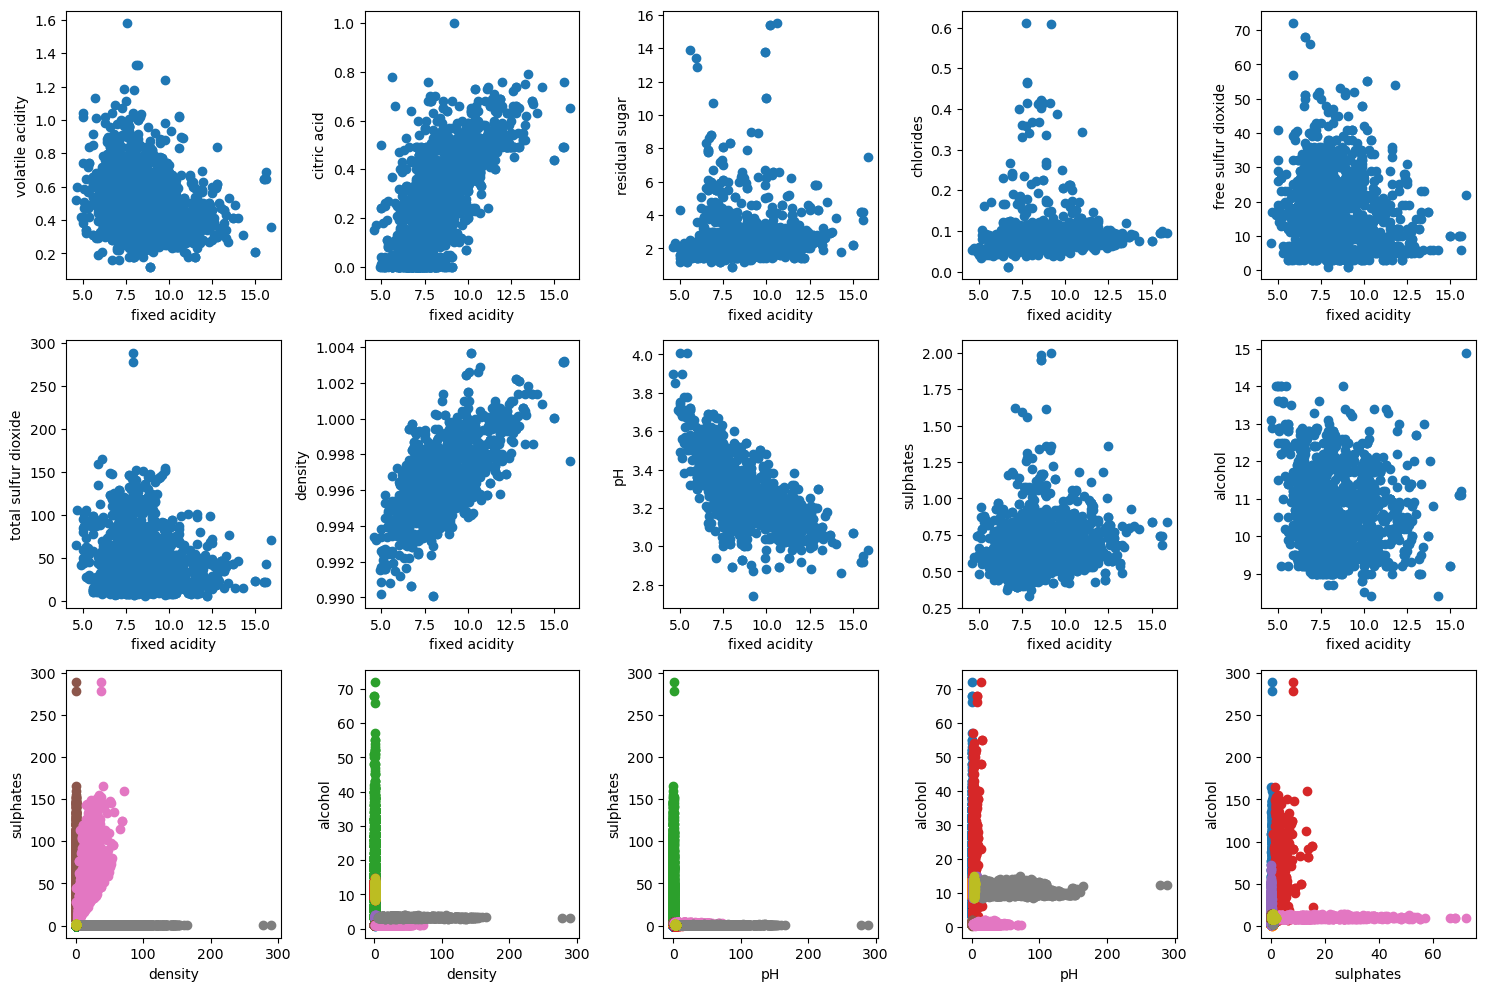

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))

c = 0
r = 0
for i in range(len(df.columns)-2):
  for j in range(i+1, len(df.columns)-1):
    x_ = df.columns[i]
    y_ = df.columns[j]

    axes[r,c%5].scatter(df[x_], df[y_])
    axes[r,c%5].set_xlabel(x_)
    axes[r,c%5].set_ylabel(y_)
    c += 1
    if c >= 5:
      r = 1
    if c >= 10:
      r = 2
fig.tight_layout()

<Axes: >

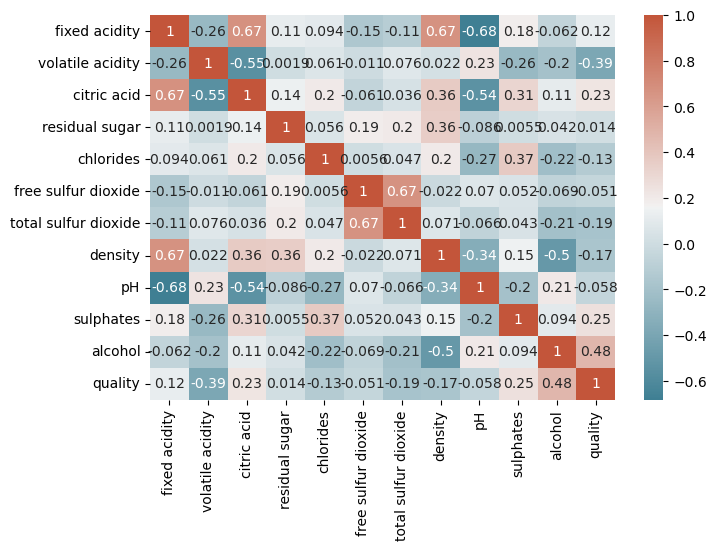

In [4]:
corr = df.corr(method="pearson")
plt.subplots(figsize=(7.5,5))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

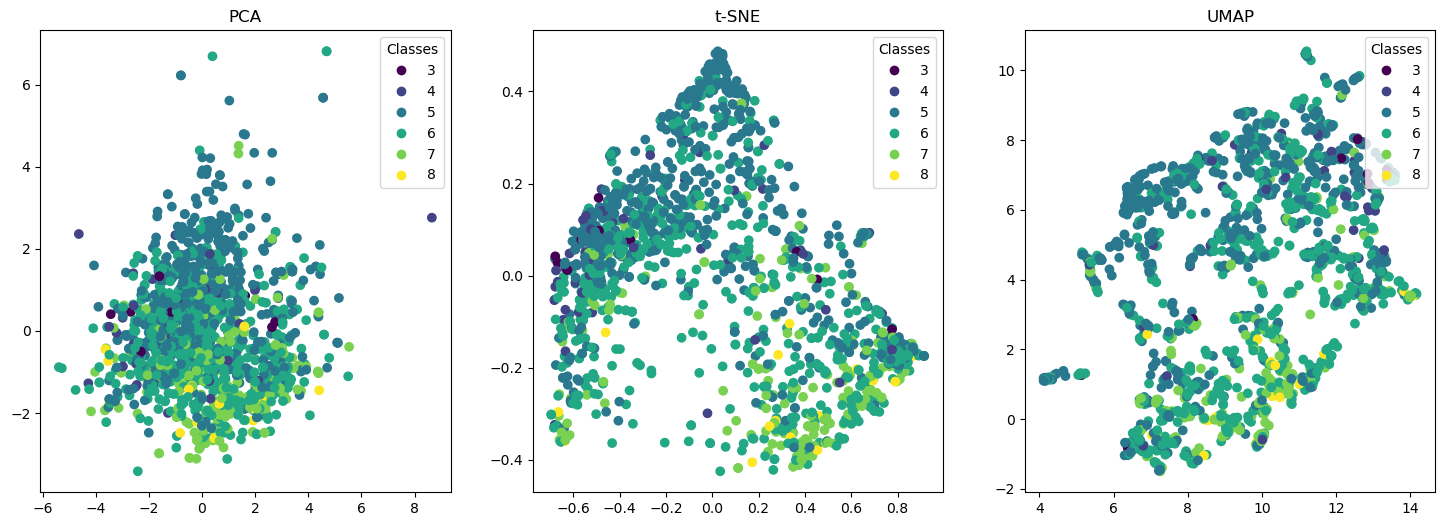

In [5]:
# PCA 적용
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=250)
tsne_result = tsne.fit_transform(X_scaled)

# UMAP 적용
umap_result = umap.UMAP(n_components=2).fit_transform(X_scaled)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scatter_pca  = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis')
legend1 = axes[0].legend(*scatter_pca.legend_elements(), title="Classes", loc="upper right")
axes[0].set_title('PCA')

scatter_tsne = axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')
legend2 = axes[1].legend(*scatter_tsne.legend_elements(), title="Classes", loc="upper right")
axes[1].set_title('t-SNE')

scatter_umap =axes[2].scatter(umap_result[:, 0], umap_result[:, 1], c=y, cmap='viridis')
legend3 = axes[2].legend(*scatter_umap.legend_elements(), title="Classes", loc="upper right")
axes[2].set_title('UMAP')

plt.show()


2) week8_sam3_testset과 week8_sam3_prediction 데이터를 합친 후, prediction의 pandas dataframe의 index 값을 PCA, t-SNE, UMAP에 찍어 1행 3열의 그림으로 만들어보세요. 예를 들어, index 0~9까지가 prediction의 샘플이라면, 각 그래프에 그 인덱스 번호를 찍습니다.

NaN 값을 포함하는 행:
     land_command  water_command  force  intelligence  politics  charm  class
367            72             70     21            84        80     62    NaN
368            83             72     92            37        30     55    NaN
369            66             26     72            58        47     51    NaN
370            36             11     42            68        73     79    NaN
371            90             76     95            67        64     87    NaN
372            65             24     66            59        52     67    NaN
373            63             20     72            43        29     53    NaN
374            62             31     68            51        40     39    NaN
375            73             70     70            61        72     71    NaN
376            21             13     25            58        69     72    NaN


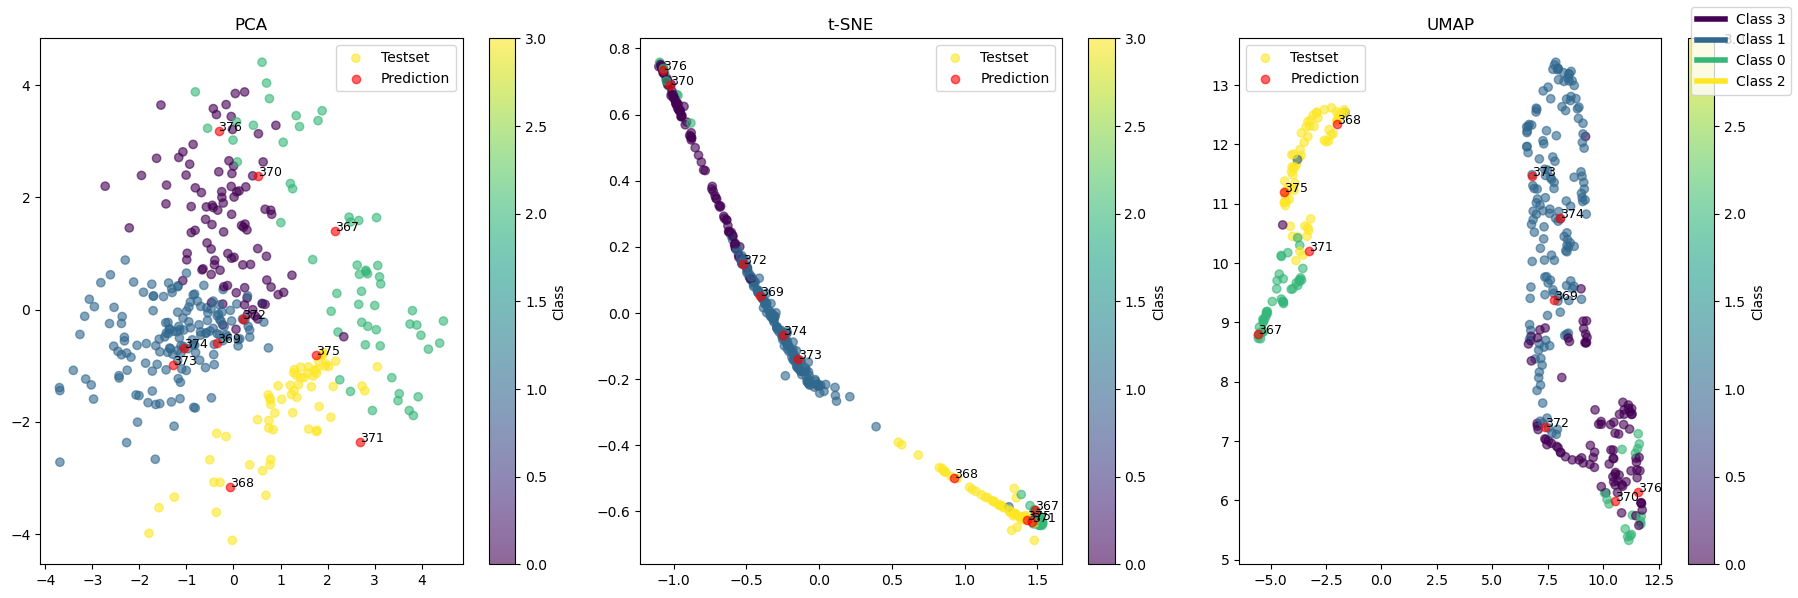

In [6]:
### 데이터셋 로드
testset = pd.read_excel('week8_sam3_testset.xlsx')
prediction = pd.read_excel('week8_sam3_prediction.xlsx')

# 데이터셋 병합 및 인덱스 재설정
combined_data = pd.concat([testset, prediction], axis=0).reset_index(drop=True)
features = combined_data.drop(columns=['class'])
labels = combined_data['class']

# NaN 값을 포함하는 행 선택
nan_rows = combined_data[combined_data.isna().any(axis=1)]
print("NaN 값을 포함하는 행:")
print(nan_rows)

# NaN 값을 포함하는 행의 인덱스를 확인
prediction_indices = combined_data[combined_data['class'].isna()].index

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCA 적용
pca = PCA(n_components=2)
pca_result_combined = pca.fit_transform(features_scaled)

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, n_iter=250)
tsne_result_combined = tsne.fit_transform(features_scaled)

# UMAP 적용
umap_result_combined = umap.UMAP(n_components=2).fit_transform(features_scaled)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA
scatter_pca = axes[0].scatter(pca_result_combined[:len(testset), 0], pca_result_combined[:len(testset), 1], c=labels[:len(testset)], cmap='viridis', label='Testset', alpha=0.6)
axes[0].scatter(pca_result_combined[len(testset):, 0], pca_result_combined[len(testset):, 1], color='red', label='Prediction', alpha=0.6)
for i in prediction_indices:
    axes[0].text(pca_result_combined[i, 0], pca_result_combined[i, 1], str(i), fontsize=9)
axes[0].legend()
axes[0].set_title('PCA')

# t-SNE
scatter_tsne = axes[1].scatter(tsne_result_combined[:len(testset), 0], tsne_result_combined[:len(testset), 1], c=labels[:len(testset)], cmap='viridis', label='Testset', alpha=0.6)
axes[1].scatter(tsne_result_combined[len(testset):, 0], tsne_result_combined[len(testset):, 1], color='red', label='Prediction', alpha=0.6)
for i in prediction_indices:
    axes[1].text(tsne_result_combined[i, 0], tsne_result_combined[i, 1], str(i), fontsize=9)
axes[1].legend()
axes[1].set_title('t-SNE')

# UMAP
scatter_umap = axes[2].scatter(umap_result_combined[:len(testset), 0], umap_result_combined[:len(testset), 1], c=labels[:len(testset)], cmap='viridis', label='Testset', alpha=0.6)
axes[2].scatter(umap_result_combined[len(testset):, 0], umap_result_combined[len(testset):, 1], color='red', label='Prediction', alpha=0.6)
for i in prediction_indices:
    axes[2].text(umap_result_combined[i, 0], umap_result_combined[i, 1], str(i), fontsize=9)
axes[2].legend()
axes[2].set_title('UMAP')

# 컬러바 추가
cbar = fig.colorbar(scatter_pca, ax=axes[0])
cbar.set_label('Class')
cbar = fig.colorbar(scatter_tsne, ax=axes[1])
cbar.set_label('Class')
cbar = fig.colorbar(scatter_umap, ax=axes[2])
cbar.set_label('Class')

# 클래스별 색상 범례 추가
unique_classes = labels[:len(testset)].unique()
colors = [plt.cm.viridis(i / float(len(unique_classes)-1)) for i in range(len(unique_classes))]

# 범례 설정
handles = [plt.Line2D([0, 1], [0, 0], color=colors[i], lw=4) for i in range(len(unique_classes))]
labels_legend = [f'Class {int(cls)}' for cls in unique_classes]
fig.legend(handles, labels_legend, loc='upper right')

plt.tight_layout()
plt.show()

3) 위의 차원 축소 그래프를 바탕으로 prediction 샘플에 대한 class 예측을 다시 하여 엑셀 형태로 제출하십시오.

In [9]:
def update_class_value(prediction_df, index, value):
    prediction_df.at[index, 'class'] = value


update_cla  ss_value(prediction, 0, 0) # 367            72             70     21            84        80     62    NaN
update_class_value(prediction, 1, 2) # 368            83             72     92            37        30     55    NaN
update_class_value(prediction, 2, 1) # 369            66             26     72            58        47     51    NaN
update_class_value(prediction, 3, 3) # 370            36             11     42            68        73     79    NaN
update_class_value(prediction, 4, 0) # 371            90             76     95            67        64     87    NaN
update_class_value(prediction, 5, 3) # 372            65             24     66            59        52     67    NaN
update_class_value(prediction, 6, 1) # 373            63             20     72            43        29     53    NaN
update_class_value(prediction, 7, 1) # 374            62             31     68            51        40     39    NaN
update_class_value(prediction, 8, 2) # 375            73             70     70            61        72     71    NaN
update_class_value(prediction, 9, 3) # 376            21             13     25            58        69     72    NaN

prediction.to_excel('week9_247767.xlsx', index=False)

In [10]:
prediction

,land_command,water_command,force,intelligence,politics,charm,class
0,72,70,21,84,80,62,0.0
1,83,72,92,37,30,55,2.0
2,66,26,72,58,47,51,1.0
3,36,11,42,68,73,79,3.0
4,90,76,95,67,64,87,0.0
5,65,24,66,59,52,67,3.0
6,63,20,72,43,29,53,1.0
7,62,31,68,51,40,39,1.0
8,73,70,70,61,72,71,2.0
9,21,13,25,58,69,72,3.0
